### Implementing Simple Chatbot using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

### Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDm6oDnJ7qSsG55vE2BAlUItxc6D9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3ae452d0-caff-4ceb-a1a8-2fb0315b0186-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### We will start with creating Nodes

In [8]:
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
memory = MemorySaver()

def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

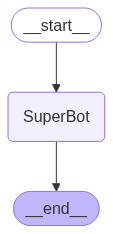

In [9]:
graph = StateGraph(State)

##node
graph.add_node("SuperBot", superbot)

#Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile(checkpointer=memory)

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
config = {"configurable":{"thread_id":"1"}}
graph_builder.invoke({'messages':"Hi, My name is Tejaswi and I like Machine Learning"}, config=config)

{'messages': [HumanMessage(content='Hi, My name is Tejaswi and I like Machine Learning', additional_kwargs={}, response_metadata={}, id='2ddda89a-b364-4326-bf4b-74152bf12b67'),
  AIMessage(content="Hi Tejaswi! It's great to hear that you like Machine Learning. There are so many exciting areas to explore within the field, from supervised and unsupervised learning to deep learning and natural language processing. Do you have any specific topics or projects in mind that you're interested in?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 20, 'total_tokens': 77, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDmD4CcO8eQL82nMoJ8VXim7RVhgS', 'service_tier': 'default', 'finis

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.


#### Streaming The Responses With Stream Method

In [20]:
config = {"configurable":{"thread_id":"2"}}


for chunk in graph_builder.stream({'messages':"Hi, My name is Tejaswi and I like Machine Learning"}, config=config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Tejaswi! It's great to hear that you like Machine Learning. There are so many exciting areas to explore within the field, from supervised and unsupervised learning to deep learning and natural language processing. What specific aspects of Machine Learning are you interested in, or are you working on any projects?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 20, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDmLwvqsVTSJaQhwPf8ToTu4JHaSr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c83087ed-d818-498e-ae7d-2e3c72b6e8a8-0', usage_metadata={'input_tokens': 20, 'outpu

In [21]:
for chunk in graph_builder.stream({'messages':"I also like Deep learning"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Tejaswi and I like Machine Learning', additional_kwargs={}, response_metadata={}, id='33ed6990-3ea5-4369-9bcd-e37461b56e53'), AIMessage(content="Hi Tejaswi! It's great to hear that you like Machine Learning. There are so many exciting areas to explore within the field, from supervised and unsupervised learning to deep learning and natural language processing. What specific aspects of Machine Learning are you interested in, or are you working on any projects?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 20, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDmLwvqsVTSJaQhwPf8ToTu4JHaSr', 'service_tier

In [22]:
for chunk in graph_builder.stream({'messages':"I also like Deep Learning"}, config=config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="That's great to hear! Deep learning is a powerful area of machine learning that has transformed many industries. Whether it's through convolutional neural networks (CNNs) for image processing, recurrent neural networks (RNNs) for sequence data, or transformers for natural language processing, there's so much to learn and explore.\n\nDo you have any favorite projects or applications of deep learning that you find particularly interesting? Or are there specific concepts or techniques in deep learning that you want to dive deeper into?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 185, 'total_tokens': 282, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8

In [19]:
for chunk in graph_builder.stream({'messages':"I love LLMOPS"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Tejaswi and I like Machine Learning', additional_kwargs={}, response_metadata={}, id='2ddda89a-b364-4326-bf4b-74152bf12b67'), AIMessage(content="Hi Tejaswi! It's great to hear that you like Machine Learning. There are so many exciting areas to explore within the field, from supervised and unsupervised learning to deep learning and natural language processing. Do you have any specific topics or projects in mind that you're interested in?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 20, 'total_tokens': 77, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDmD4CcO8eQL82nMoJ8VXim7RVhgS', 'service_tier': 'default', 'finish_

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [26]:
config = {"configurable":{"thread_id":"3"}}

async for event in graph_builder.astream_events({"messages":["Hi! my name is Tejas and I like machine learning"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi! my name is Tejas and I like machine learning']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '1f3e1844-a987-4592-87ac-ca153fc1b1bd', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi! my name is Tejas and I like machine learning', additional_kwargs={}, response_metadata={}, id='b1047c16-7307-4696-931e-2657758336fb')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '113cf981-7954-4728-93fd-757ae075fa5f', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:25c1f7ec-6149-8560-b92b-571f798c61a1'}, 'parent_ids': ['1f3e1844-a987-4592-87ac-ca153fc1b1bd']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi! my name is Tejas and I like m